In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot
from matplotlib.lines import Line2D 
from pandas import DataFrame, Series
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import requests
import re
import json

In [90]:
num_coins = 1000
num_flips = 10
results = []
for n in range(100000):
    runs = []
    for c in range(num_coins):
        flips = np.random.random(size=num_flips)
        heads = (flips >= 0.5).sum() / num_flips
        runs.append(heads)
    v1 = runs[0]
    vrand = runs[np.random.randint(0, num_coins-1)]
    vmin = np.min(runs)
    results.append([v1, vrand, vmin])
results = np.array(results)
print(np.average(results[:,2]))
results[:5]

0.037923


array([[ 0.7,  0.3,  0.1],
       [ 0.5,  0.5,  0.1],
       [ 0.5,  0.3,  0.1],
       [ 0.6,  0.5,  0.1],
       [ 0.4,  0.5,  0. ]])

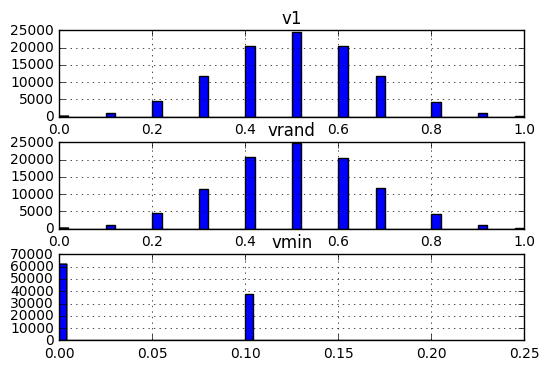

In [124]:
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
v1_fr = pd.DataFrame(results[:,0], columns=['v1'])
v1_fr.hist(ax=ax1, bins=50)

ax2 = fig.add_subplot(3,1,2)
vrand_fr = pd.DataFrame(results[:,1], columns=['vrand'])
vrand_fr.hist(ax=ax2, bins=50)

ax3 = fig.add_subplot(3,1,3)
vmin_fr = pd.DataFrame(results[:,2], columns=['vmin'])
vmin_fr.hist(ax=ax3, bins=50)

None

# Linear Regression (Q.5,6,7)

In [191]:
def genX(n):
    x = (np.random.rand(n,2) - 0.5) * 2
    x = np.append(np.ones((n,1)), x, 1)
    return x

In [326]:
N = 100
eins = []
for _ in range(1000):
    tps = (np.random.rand(2,2) - 0.5) * 2
    w2 = 1
    w1 = (tps[1,1] - tps[0,1])/(tps[0,0] - tps[1,0])
    w0 = -(w1*tps[0,0] + tps[0,1])
    W = np.array([w0,w1,w2])
    #print('W', W)

    X = genX(N)
    #print('X', X[:5], '...')
    F = (X * W).sum(axis=1)
    #print('F', F[:5], '...')

    Y = np.sign(F)
    #print('Y', Y)

    Xm = np.matrix(X)
    w_lin = np.array(Xm.T.dot(Xm).I.dot(Xm.T).dot(Y).flat)
    #print('w_lin', w_lin)

    g = np.sign((X * w_lin).sum(axis=1))
    ein = g[g!=Y].size / N
    eins.append(ein)
E_in = np.average(eins)
print('E_in', E_in)

E_in 0.03978


In [358]:
M = 1000
eouts = []
for _ in range(1000):
    X_out = genX(M)
    g_out = np.sign((X_out * w_lin).sum(axis=1))
    f_out = np.sign((X_out * W).sum(axis=1))
    eout = g_out[g_out != f_out].size / M
    eouts.append(eout)
E_out = np.average(eouts)
E_out

0.05306300000000002

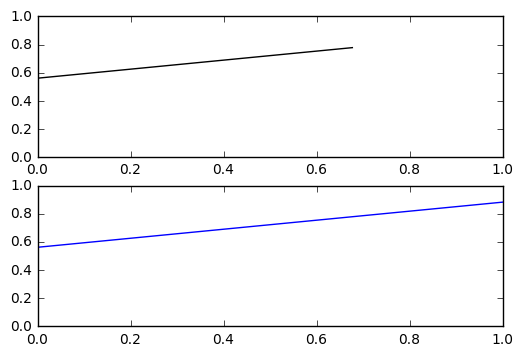

In [360]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(tps[:,0], tps[:,1], 'k-')
pylab.xlim([0,1])
pylab.ylim([0,1])

ax2 = fig.add_subplot(2,1,2)
ax2.plot([0,1], [-w0,-w0-w1])
pylab.xlim([0,1])
pylab.ylim([0,1])
None

In [363]:
w_lin

array([-0.52804452, -0.42143473,  1.15968353])

In [364]:
W

array([-0.56182371, -0.32026918,  1.        ])

In [404]:
wg = w_lin
runs = []
for _ in range(1000):
    for n in range(999):
        X = genX(10)
        #print('X', X)
        f = np.sign((X * W).sum(axis=1))
        g = np.sign((X * wg).sum(axis=1))
        matches = g == f
        if matches.min():
            runs.append(n + 1)
            break
        else:
            i = matches.argmin()
            wg = X[i] * f[i] + wg
np.average(runs)

1.3200000000000001

# Nonlinear Transformation

In [462]:
N = 1000
gs = []
for _ in range(1000):
    X = genX(N)
    F = np.sign((np.square(X) + [-1.6,0,0]).sum(axis=1))
    Y = np.sign((np.square(X) + [-1.6,0,0]).sum(axis=1))
    for _ in range(int(N/10)):
        i = np.random.randint(0, high=N)
        Y[i] = -Y[i]
    w_lin = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    g = np.sign((X * w_lin).sum(axis=1))
    gs.append(g[g!=F].size / N)
np.average(gs)

0.51269600000000004

In [498]:
N = 1000
trans = lambda x: [1, x[1], x[2], x[1]*x[2], x[1]*x[1], x[2]*x[2]]
options = np.array([
    [-1, -0.05, 0.08, 0.13, 1.5, 1.5],    #a
    [-1, -0.05, 0.08, 0.13, 1.5, 15],     #b
    [-1, -0.05, 0.08, 0.13, 15, 1.5],     #c
    [-1, -1.5, 0.08, 0.13, 0.05, 0.05],   #d
    [-1, -0.05, 0.08, 1.5, 0.15, 0.15]])  #e

matches = np.zeros(options.shape[0])
for _ in range(100):
    X = genX(N)
    #print('X', X[:5], '...')
    F = np.sign((np.square(X) + [-1.6,0,0]).sum(axis=1)) # target function
    Y = np.sign((np.square(X) + [-1.6,0,0]).sum(axis=1)) # results with noise
    for _ in range(int(N/10)):
        i = np.random.randint(0, high=N)
        Y[i] = -Y[i]

    Z = np.apply_along_axis(trans, 1, X)
    #print('Z', Z[:5], '...')
    w_lin = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(Y)
    #print('w_lin', w_lin)
    gw = np.sign((Z * w_lin).sum(axis=1))
    disagrees = []
    for opt in options:
        gopt = np.sign((Z * opt).sum(axis=1))
        disagrees.append(gw[gw!=gopt].size)
    i = np.argmin(disagrees)
    matches[i] = matches[i] + 1
matches

array([ 100.,    0.,    0.,    0.,    0.])

In [500]:
eouts = []
for _ in range(1000):
    X = genX(N)
    XOUT = genX(N)
    #F = np.sign((np.square(X) + [-1.6,0,0]).sum(axis=1)) # target function
    Y = np.sign((np.square(X) + [-1.6,0,0]).sum(axis=1)) # results with noise
    #FOUT = np.sign((np.square(XOUT) + [-1.6,0,0]).sum(axis=1))
    YOUT = np.sign((np.square(XOUT) + [-1.6,0,0]).sum(axis=1))
    for _ in range(int(N/10)):
        i = np.random.randint(0, high=N)
        Y[i] = -Y[i]
        iout = np.random.randint(0, high=N)
        YOUT[iout] = -YOUT[iout]

    Z = np.apply_along_axis(trans, 1, X)
    w_lin = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(Y)
    ZOUT = np.apply_along_axis(trans, 1, XOUT)
    gout = np.sign((ZOUT * w_lin).sum(axis=1))
    eouts.append(gout[gout!=YOUT].size / N)
np.average(eouts)

0.116962